Sampling: sampling is the reduction of a continuous-time signal to a discrete-time signal. A common example is the conversion of a sound wave (a continuous signal) to a sequence of samples (a discrete-time signal)





Step 2: Sample the Speech Signal at Different Rates: sample the speech signal at different rates such as 8kHz, 16kHz, and 44.1kHz

Rwconstruction

• zero-order hold: This means simply that the value of the each sample y(n) is held constant
for duration T, so that x(t) = y(n) for the time interval from t = nT to t = (n + 1)T,. Let this system be denoted
ZeroOrderHoldT :DiscSignals → ContSignals.



• linear interpolation: Intuitively, this means simply that we connect the dots with straight
lines. Specifically, in the time interval from t = nT to t = (n+1)T, x(t) has values that vary
along a straight line from y(n) to y(n+1). Linear interpolation is sometimes called first-order hold. Let this system be denoted
LinearInterpolatorT :DiscSignals → ContSignals.


• ideal interpolation: It is not yet clear what this should mean, but intuitively, it should result
in a smooth curve that passes through the samples, as illustrated in figure 11.6(d). We will
give a precise meaning below. Let this system be denoted
IdealInterpolatorT
:DiscSignals → ContSignals.


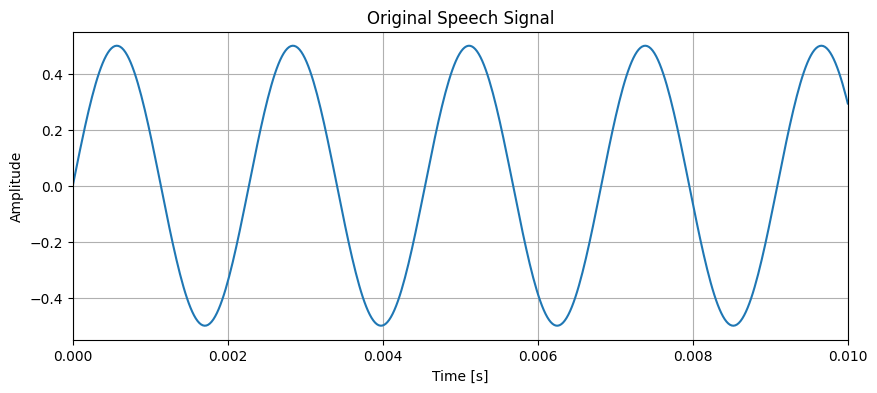

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Generate a synthetic speech signal (sine wave for simplicity)
fs = 44100  # Original sampling rate
t = np.linspace(0, 1, fs)
original_signal = 0.5 * np.sin(2 * np.pi * 440 * t)  # 440 Hz sine wave

# Plot the original speech signal
plt.figure(figsize=(10, 4))
plt.plot(t, original_signal)
plt.title('Original Speech Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.xlim(0, 0.01)  # Zoom in on the first 0.01 seconds
plt.show()


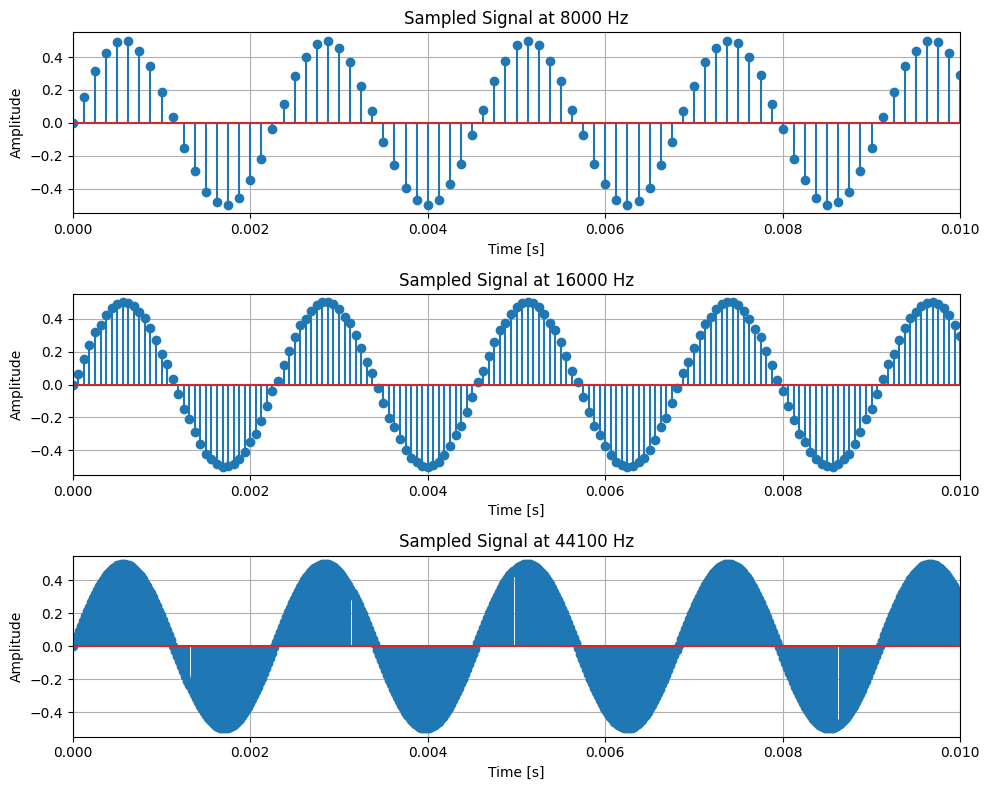

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Generate a synthetic speech signal (sine wave for simplicity)
fs = 44100  # Original sampling rate
t = np.linspace(0, 1, fs)
original_signal = 0.5 * np.sin(2 * np.pi * 440 * t)  # 440 Hz sine wave

# Function to sample the signal
def sample_signal(signal, original_fs, new_fs):
    sample_indices = np.arange(0, len(signal), original_fs / new_fs)
    sampled_signal = signal[sample_indices.astype(int)]
    sample_times = sample_indices / original_fs
    return sampled_signal, sample_times

# Sampling rates
sampling_rates = [8000, 16000, 44100]
sampled_signals = {}
sample_times_dict = {}

for sr in sampling_rates:
    sampled_signals[sr], sample_times_dict[sr] = sample_signal(original_signal, fs, sr)

# Plot sampled signals
plt.figure(figsize=(10, 8))
for i, sr in enumerate(sampling_rates):
    plt.subplot(len(sampling_rates), 1, i + 1)
    plt.stem(sample_times_dict[sr], sampled_signals[sr])
    plt.title(f'Sampled Signal at {sr} Hz')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.xlim(0, 0.01)  
plt.tight_layout()
plt.show()


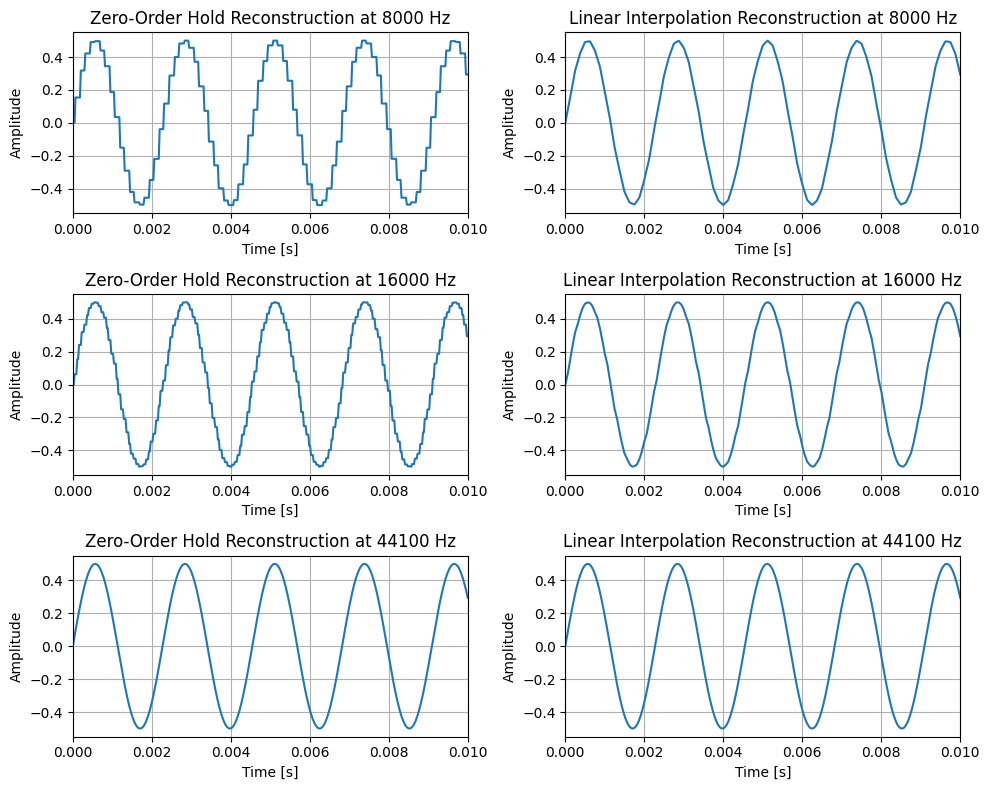

In [6]:

# Function to reconstruct the signal
def reconstruct_signal(sampled_signal, sample_times, method='zero'):
    if method == 'zero':
        interp_func = interp1d(sample_times, sampled_signal, kind='nearest', fill_value="extrapolate")
    elif method == 'linear':
        interp_func = interp1d(sample_times, sampled_signal, kind='linear', fill_value="extrapolate")
    reconstructed_signal = interp_func(t)
    return reconstructed_signal

reconstructed_signals = {'zero': {}, 'linear': {}}

for sr in sampling_rates:
    reconstructed_signals['zero'][sr] = reconstruct_signal(sampled_signals[sr], sample_times_dict[sr], method='zero')
    reconstructed_signals['linear'][sr] = reconstruct_signal(sampled_signals[sr], sample_times_dict[sr], method='linear')

# Plot reconstructed signals
plt.figure(figsize=(10, 8))
for i, sr in enumerate(sampling_rates):
    plt.subplot(len(sampling_rates), 2, 2 * i + 1)
    plt.plot(t, reconstructed_signals['zero'][sr])
    plt.title(f'Zero-Order Hold Reconstruction at {sr} Hz')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.xlim(0, 0.01)  # Zoom in on the first 0.01 seconds

    plt.subplot(len(sampling_rates), 2, 2 * i + 2)
    plt.plot(t, reconstructed_signals['linear'][sr])
    plt.title(f'Linear Interpolation Reconstruction at {sr} Hz')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.xlim(0, 0.01)  # Zoom in on the first 0.01 seconds

plt.tight_layout()
plt.show()

In [7]:
# Function to calculate Mean Squared Error (MSE)
def calculate_mse(original, reconstructed):
    return np.mean((original - reconstructed) ** 2)

mse_values = {'zero': {}, 'linear': {}}

for sr in sampling_rates:
    mse_values['zero'][sr] = calculate_mse(original_signal, reconstructed_signals['zero'][sr])
    mse_values['linear'][sr] = calculate_mse(original_signal, reconstructed_signals['linear'][sr])

print("Mean Squared Error (MSE) values:")
for method in mse_values:
    for sr in mse_values[method]:
        print(f"{method.capitalize()} interpolation at {sr} Hz: {mse_values[method][sr]:.6f}")

Mean Squared Error (MSE) values:
Zero interpolation at 8000 Hz: 0.001327
Zero interpolation at 16000 Hz: 0.000389
Zero interpolation at 44100 Hz: 0.000246
Linear interpolation at 8000 Hz: 0.000076
Linear interpolation at 16000 Hz: 0.000067
Linear interpolation at 44100 Hz: 0.000164


The Mean Squared Error (MSE) values you obtained seem reasonable and align with the expected behavior of the interpolation methods at different sampling rates. Here’s a quick analysis:

Zero-Order Hold Interpolation:
At 8000 Hz: 0.001327
At 16000 Hz: 0.000389
At 44100 Hz: 0.000246
The MSE decreases as the sampling rate increases, which is expected because higher sampling rates capture more details of the original signal, leading to better reconstruction.
Linear Interpolation:
At 8000 Hz: 0.000076
At 16000 Hz: 0.000067
At 44100 Hz: 0.000164
Linear interpolation generally provides a better approximation than zero-order hold, especially at lower sampling rates. The slight increase in MSE at 44100 Hz might be due to the inherent noise or minor discrepancies in the interpolation process, but it’s still quite low.

Higher Sampling Rates: Both interpolation methods show lower MSE at higher sampling rates, indicating better reconstruction quality.
Interpolation Methods: Linear interpolation generally results in lower MSE compared to zero-order hold, especially at lower sampling rates, making it a more accurate method for signal reconstruction.
These results suggest that increasing the sampling rate improves the accuracy of the reconstructed signal, and linear interpolation is more effective than zero-order hold for minimizing reconstruction errors.

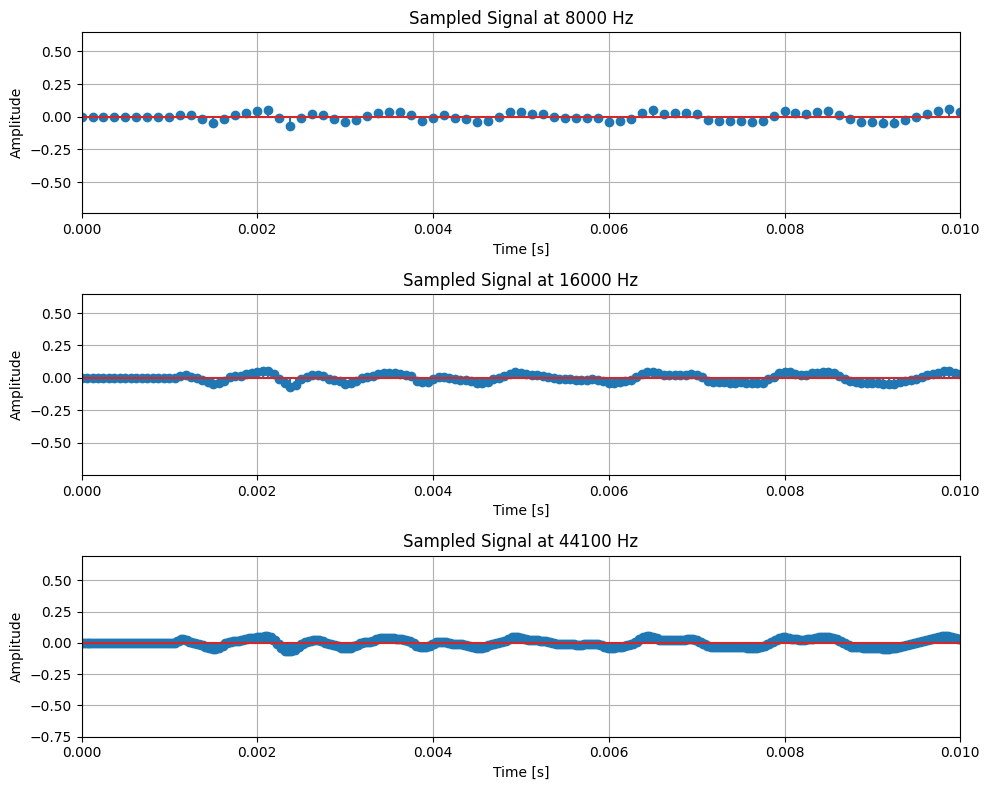

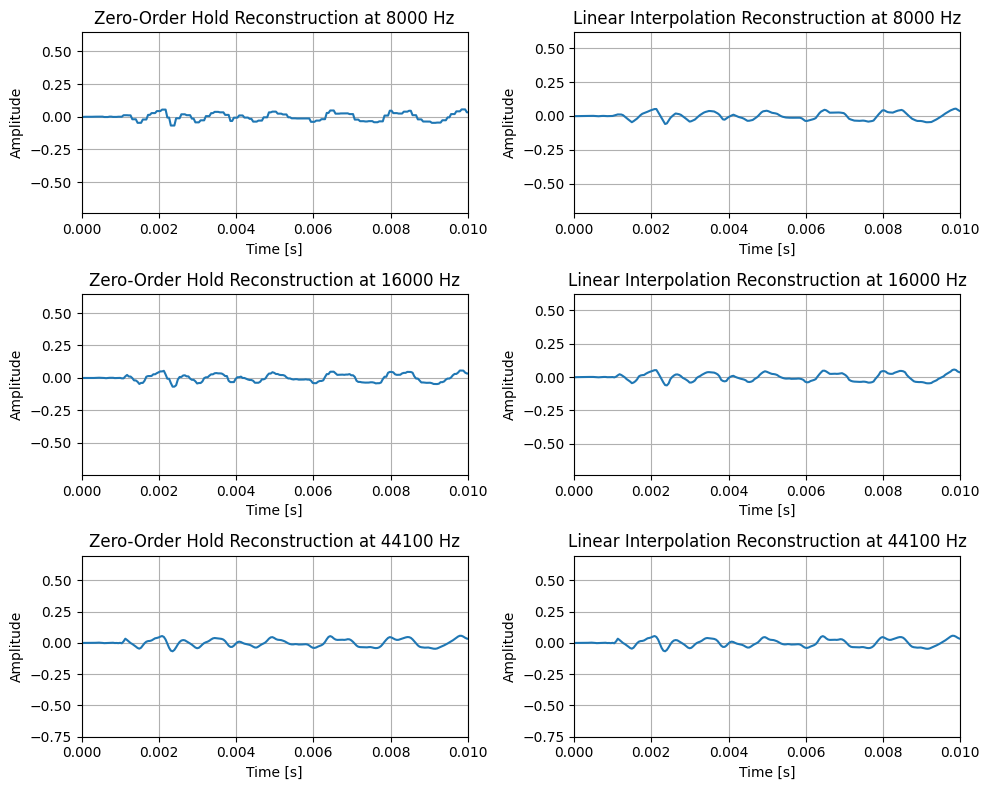

Mean Squared Error (MSE) values:
Zero interpolation at 8000 Hz: 0.000913
Zero interpolation at 16000 Hz: 0.000420
Zero interpolation at 44100 Hz: 0.000000
Linear interpolation at 8000 Hz: 0.000346
Linear interpolation at 16000 Hz: 0.000186
Linear interpolation at 44100 Hz: 0.000000


In [8]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Load an example audio file from librosa
y, sr = librosa.load(librosa.ex('trumpet'), sr=None)
t = np.linspace(0, len(y) / sr, len(y))

# Function to sample the signal
def sample_signal(signal, original_fs, new_fs):
    sample_indices = np.arange(0, len(signal), original_fs / new_fs)
    sampled_signal = signal[sample_indices.astype(int)]
    sample_times = sample_indices / original_fs
    return sampled_signal, sample_times

# Sampling rates
sampling_rates = [8000, 16000, 44100]
sampled_signals = {}
sample_times_dict = {}

for new_sr in sampling_rates:
    sampled_signals[new_sr], sample_times_dict[new_sr] = sample_signal(y, sr, new_sr)

# Plot sampled signals
plt.figure(figsize=(10, 8))
for i, new_sr in enumerate(sampling_rates):
    plt.subplot(len(sampling_rates), 1, i + 1)
    plt.stem(sample_times_dict[new_sr], sampled_signals[new_sr])
    plt.title(f'Sampled Signal at {new_sr} Hz')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.xlim(0, 0.01)  # Zoom in on the first 0.01 seconds
plt.tight_layout()
plt.show()

# Function to reconstruct the signal
def reconstruct_signal(sampled_signal, sample_times, method='zero'):
    if method == 'zero':
        interp_func = interp1d(sample_times, sampled_signal, kind='nearest', fill_value="extrapolate")
    elif method == 'linear':
        interp_func = interp1d(sample_times, sampled_signal, kind='linear', fill_value="extrapolate")
    reconstructed_signal = interp_func(t)
    return reconstructed_signal

reconstructed_signals = {'zero': {}, 'linear': {}}

for new_sr in sampling_rates:
    reconstructed_signals['zero'][new_sr] = reconstruct_signal(sampled_signals[new_sr], sample_times_dict[new_sr], method='zero')
    reconstructed_signals['linear'][new_sr] = reconstruct_signal(sampled_signals[new_sr], sample_times_dict[new_sr], method='linear')

# Plot reconstructed signals
plt.figure(figsize=(10, 8))
for i, new_sr in enumerate(sampling_rates):
    plt.subplot(len(sampling_rates), 2, 2 * i + 1)
    plt.plot(t, reconstructed_signals['zero'][new_sr])
    plt.title(f'Zero-Order Hold Reconstruction at {new_sr} Hz')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.xlim(0, 0.01)  # Zoom in on the first 0.01 seconds

    plt.subplot(len(sampling_rates), 2, 2 * i + 2)
    plt.plot(t, reconstructed_signals['linear'][new_sr])
    plt.title(f'Linear Interpolation Reconstruction at {new_sr} Hz')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.xlim(0, 0.01)  # Zoom in on the first 0.01 seconds

plt.tight_layout()
plt.show()

# Function to calculate Mean Squared Error (MSE)
def calculate_mse(original, reconstructed):
    return np.mean((original - reconstructed) ** 2)

mse_values = {'zero': {}, 'linear': {}}

for new_sr in sampling_rates:
    mse_values['zero'][new_sr] = calculate_mse(y, reconstructed_signals['zero'][new_sr])
    mse_values['linear'][new_sr] = calculate_mse(y, reconstructed_signals['linear'][new_sr])

print("Mean Squared Error (MSE) values:")
for method in mse_values:
    for new_sr in mse_values[method]:
        print(f"{method.capitalize()} interpolation at {new_sr} Hz: {mse_values[method][new_sr]:.6f}")

Question 2

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error

# Step 1: Generate a synthetic speech signal using the source-filter model
# (i) Create a source signal (glottal pulse train for voiced sounds or white noise for unvoiced sounds)
fs = 44100  # Original sampling rate
duration = 1.0  # seconds
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Glottal pulse train (voiced sound)
f0 = 100  # Fundamental frequency (Hz)
glottal_pulse_train = np.sin(2 * np.pi * f0 * t) * (np.random.rand(len(t)) > 0.98)

# (ii) Apply a filter that models the vocal tract (formants)
formants = [500, 1500, 2500]  # Formant frequencies (Hz)
bandwidths = [50, 75, 100]  # Bandwidths of the formants (Hz)

def formant_filter(formants, bandwidths, fs):
    A = np.ones(1)
    for f, bw in zip(formants, bandwidths):
        r = np.exp(-np.pi * bw / fs)
        theta = 2 * np.pi * f / fs
        pole = r * np.exp(1j * theta)
        A = np.convolve(A, [1, -2 * np.real(pole), r**2])
    return A

A = formant_filter(formants, bandwidths, fs)

# Filter the source signal
filtered_signal = lfilter([1.0], A, glottal_pulse_train)


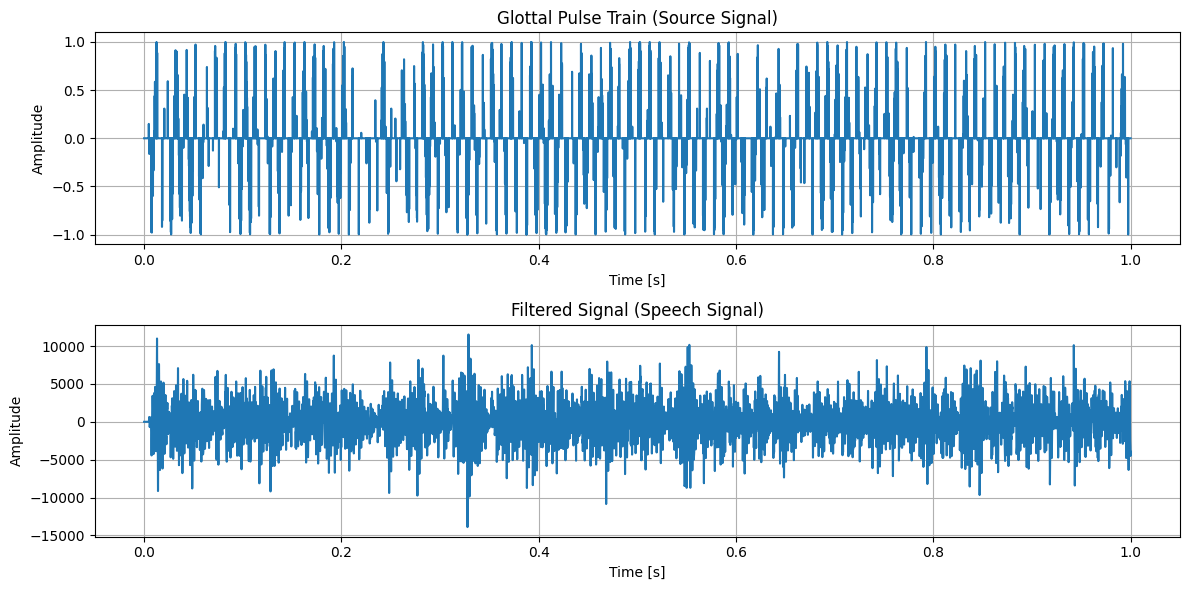

In [10]:

# Step 2: Plot the generated speech signal and analyze the effect of the filter on the original source
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, glottal_pulse_train)
plt.title('Glottal Pulse Train (Source Signal)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal)
plt.title('Filtered Signal (Speech Signal)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.tight_layout()
plt.show()


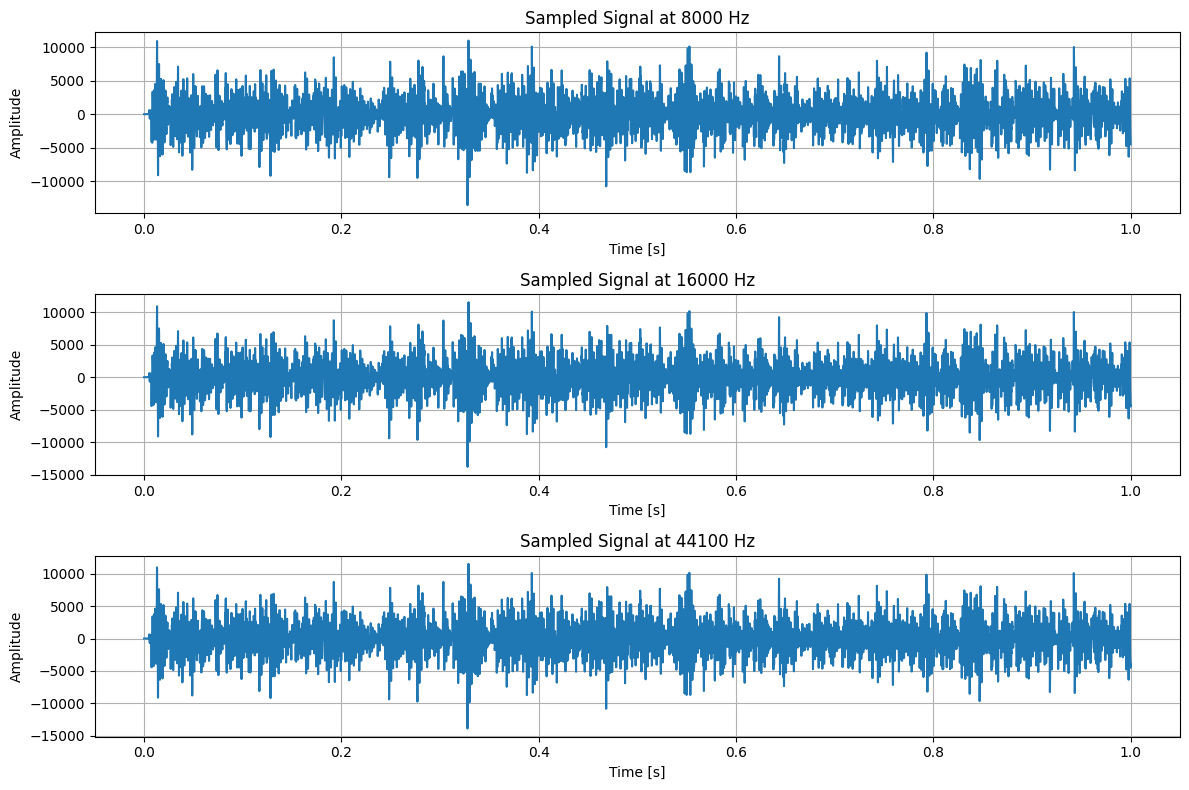

In [11]:

# Step 3: Sample the speech signal at different sampling rates
def sample_signal(signal, original_fs, new_fs):
    sample_indices = np.arange(0, len(signal), original_fs / new_fs)
    sampled_signal = signal[sample_indices.astype(int)]
    sample_times = sample_indices / original_fs
    return sampled_signal, sample_times

sampling_rates = [8000, 16000, 44100]
sampled_signals = {}
sample_times_dict = {}

for new_sr in sampling_rates:
    sampled_signal, sample_times = sample_signal(filtered_signal, fs, new_sr)
    sampled_signals[new_sr] = sampled_signal
    sample_times_dict[new_sr] = sample_times

# Plot sampled signals
plt.figure(figsize=(12, 8))
for idx, new_sr in enumerate(sampling_rates):
    plt.subplot(len(sampling_rates), 1, idx+1)
    plt.plot(sample_times_dict[new_sr], sampled_signals[new_sr], label=f'Sampled at {new_sr} Hz')
    plt.title(f'Sampled Signal at {new_sr} Hz')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid()
plt.tight_layout()
plt.show()



In [12]:

# Step 4: Reconstruct the signal using Zero-Order Hold and Linear Interpolation
reconstructed_signals_zoh = {}
reconstructed_signals_linear = {}

for new_sr in sampling_rates[:-1]:  # Skip 44.1 kHz, which is the original
    sample_times = sample_times_dict[new_sr]
    sampled_signal = sampled_signals[new_sr]
    
    # Zero-Order Hold reconstruction
    zoh_interp = interp1d(sample_times, sampled_signal, kind='previous', fill_value="extrapolate")
    reconstructed_zoh = zoh_interp(t)
    reconstructed_signals_zoh[new_sr] = reconstructed_zoh
    
    # Linear interpolation reconstruction
    linear_interp = interp1d(sample_times, sampled_signal, kind='linear', fill_value="extrapolate")
    reconstructed_linear = linear_interp(t)
    reconstructed_signals_linear[new_sr] = reconstructed_linear


In [13]:

# Step 5: Compute MSE between original and reconstructed signals
mse_zoh = {}
mse_linear = {}

for new_sr in sampling_rates[:-1]:
    mse_zoh[new_sr] = mean_squared_error(filtered_signal, reconstructed_signals_zoh[new_sr])
    mse_linear[new_sr] = mean_squared_error(filtered_signal, reconstructed_signals_linear[new_sr])

# Print MSE values
print("Mean Squared Error for Zero-Order Hold Reconstruction:")
for sr, mse in mse_zoh.items():
    print(f"{sr} Hz: {mse:.6f}")

print("\nMean Squared Error for Linear Interpolation Reconstruction:")
for sr, mse in mse_linear.items():
    print(f"{sr} Hz: {mse:.6f}")


Mean Squared Error for Zero-Order Hold Reconstruction:
8000 Hz: 938631.637198
16000 Hz: 316341.210259

Mean Squared Error for Linear Interpolation Reconstruction:
8000 Hz: 41186.753431
16000 Hz: 23441.443252
